In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 前処理

### データ入力

In [3]:
df = pd.read_csv('./card_data.csv')
df.head()

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0


データ数は6534，内モンスターは4275

In [4]:
df.count()

Name         6534
Type         6534
Level        4275
Race         6534
Attribute    4275
ATK          4275
DEF          4275
dtype: int64

基本統計量

In [5]:
df.describe()

,Level,ATK,DEF
count,4275.000000,4275.000000,4275.000000
mean,4.449591,1455.553216,1212.318129
std,2.185045,899.165365,802.966529
min,1.000000,0.000000,0.000000
25%,3.000000,800.000000,600.000000
50%,4.000000,1500.000000,1200.000000
75%,6.000000,2100.000000,1800.000000
max,12.000000,5000.000000,5000.000000


欠損値の確認

In [6]:
df.isnull().sum()

Name            0
Type            0
Level        2259
Race            0
Attribute    2259
ATK          2259
DEF          2259
dtype: int64

モンスターカードを抽出

In [7]:
df_monster = df.dropna(how='any')
df_monster.head()

,Name,Type,Level,Race,Attribute,ATK,DEF
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0
6,Lava Golem,Effect Monster,8.0,Fiend,FIRE,3000.0,2500.0
8,Seismic Crasher,Effect Monster,3.0,Rock,EARTH,1400.0,300.0
9,Laval Lancelord,Effect Monster,6.0,Warrior,FIRE,2100.0,200.0


枚数を確認

In [8]:
df_monster.count()

Name         4275
Type         4275
Level        4275
Race         4275
Attribute    4275
ATK          4275
DEF          4275
dtype: int64

グラフ描画

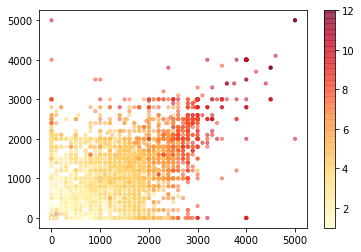

In [9]:
plt.scatter(x=df_monster['ATK'], y=df_monster['DEF'], s=10, c=df_monster['Level'], cmap='YlOrRd', alpha=0.5)
plt.colorbar()

説明変数と目的変数を用意

In [10]:
X = df_monster.loc[:, ['ATK', 'DEF']]#.values
y = df_monster.loc[:, 'Level']#.values

In [11]:
X.head()

,ATK,DEF
1,1200.0,900.0
4,920.0,1930.0
6,3000.0,2500.0
8,1400.0,300.0
9,2100.0,200.0


In [12]:
y.head()

1    3.0
4    4.0
6    8.0
8    3.0
9    6.0
Name: Level, dtype: float64

In [13]:
y.loc[y <= 4] = 0
y.loc[y > 4] = 1
y

1       0.0
4       0.0
6       1.0
8       0.0
9       1.0
11      1.0
12      0.0
13      0.0
15      0.0
16      0.0
20      0.0
22      0.0
25      0.0
26      1.0
27      0.0
32      0.0
33      1.0
34      0.0
35      1.0
36      0.0
37      0.0
39      0.0
40      0.0
41      0.0
42      0.0
44      1.0
46      0.0
47      1.0
48      0.0
49      0.0
       ... 
6490    0.0
6491    0.0
6495    1.0
6496    1.0
6497    1.0
6498    0.0
6499    0.0
6501    1.0
6502    0.0
6503    1.0
6504    1.0
6505    0.0
6506    0.0
6507    0.0
6508    1.0
6510    0.0
6511    0.0
6517    0.0
6518    0.0
6521    0.0
6522    0.0
6523    1.0
6525    0.0
6526    0.0
6527    1.0
6528    1.0
6530    0.0
6531    1.0
6532    1.0
6533    1.0
Name: Level, Length: 4275, dtype: float64

### 訓練データとテストデータに分割

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

### 標準化

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 線形SVM

### 学習(線形SVM)

In [18]:
from sklearn.svm import LinearSVC

In [19]:
lin_svm = LinearSVC().fit(X_train_scaled, y_train)

### 表示

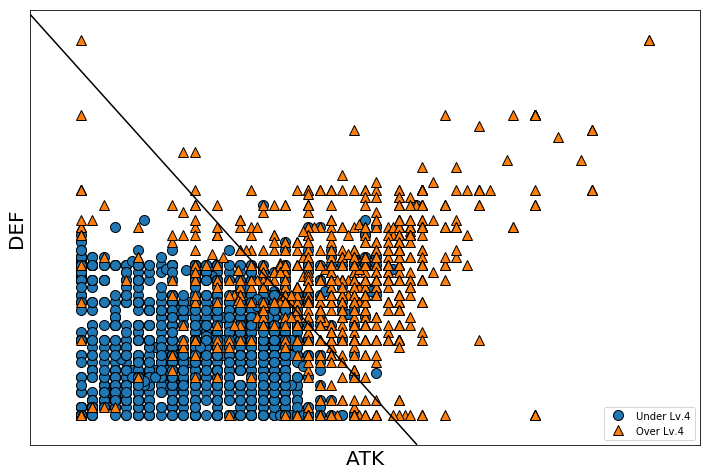

In [20]:
plt.figure(figsize=(12, 8))
mglearn.plots.plot_2d_separator(lin_svm, X_train_scaled)
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.legend(['Under Lv.4', 'Over Lv.4'], loc='best')
plt.xlabel('ATK', fontsize=20)
plt.ylabel('DEF', fontsize=20)
plt.show()

### 評価

In [21]:
lin_svm.score(X_test_scaled, y_test)

0.8877455565949486

### 交差検証

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
lin_svm_cv = LinearSVC()
scores = cross_val_score(lin_svm_cv, X_scaled, y)

In [24]:
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.87237027 0.87859649 0.89606742]
Average score: 0.8823447244793569


## カーネルSVM

### 学習

In [25]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [26]:
kernel_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, coef0=1))
])

kernel_svm.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

### 表示

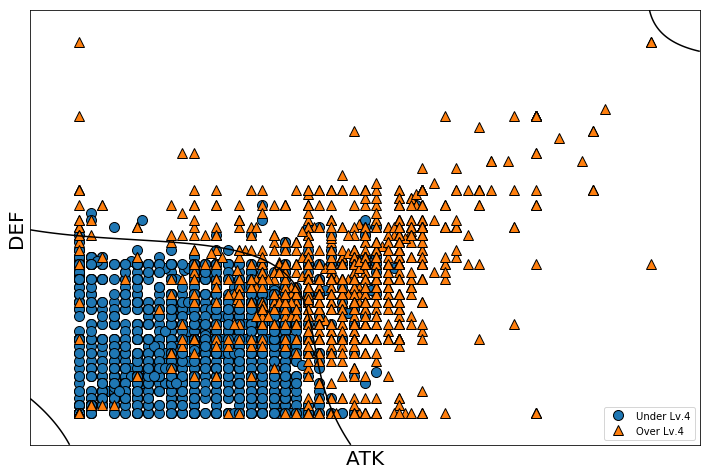

In [27]:
plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(X['ATK'], X['DEF'], y)
mglearn.plots.plot_2d_separator(kernel_svm, X.values)
plt.legend(['Under Lv.4', 'Over Lv.4'], loc='best')
plt.xlabel('ATK', fontsize=20)
plt.ylabel('DEF', fontsize=20)
plt.show()

### 評価

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion = confusion_matrix(kernel_svm.predict(X_test), y_test)
confusion

array([[673,  75],
       [ 23, 298]], dtype=int64)

In [30]:
kernel_svm.score(X_test, y_test)

0.9083255378858747

### 交差検証

In [31]:
kernel_svm_cv = SVC(kernel='poly', degree=3, coef0=1)
scores = cross_val_score(kernel_svm_cv, X_scaled, y)

In [32]:
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.89481066 0.89473684 0.90449438]
Average score: 0.898013961104757


### 追加実験

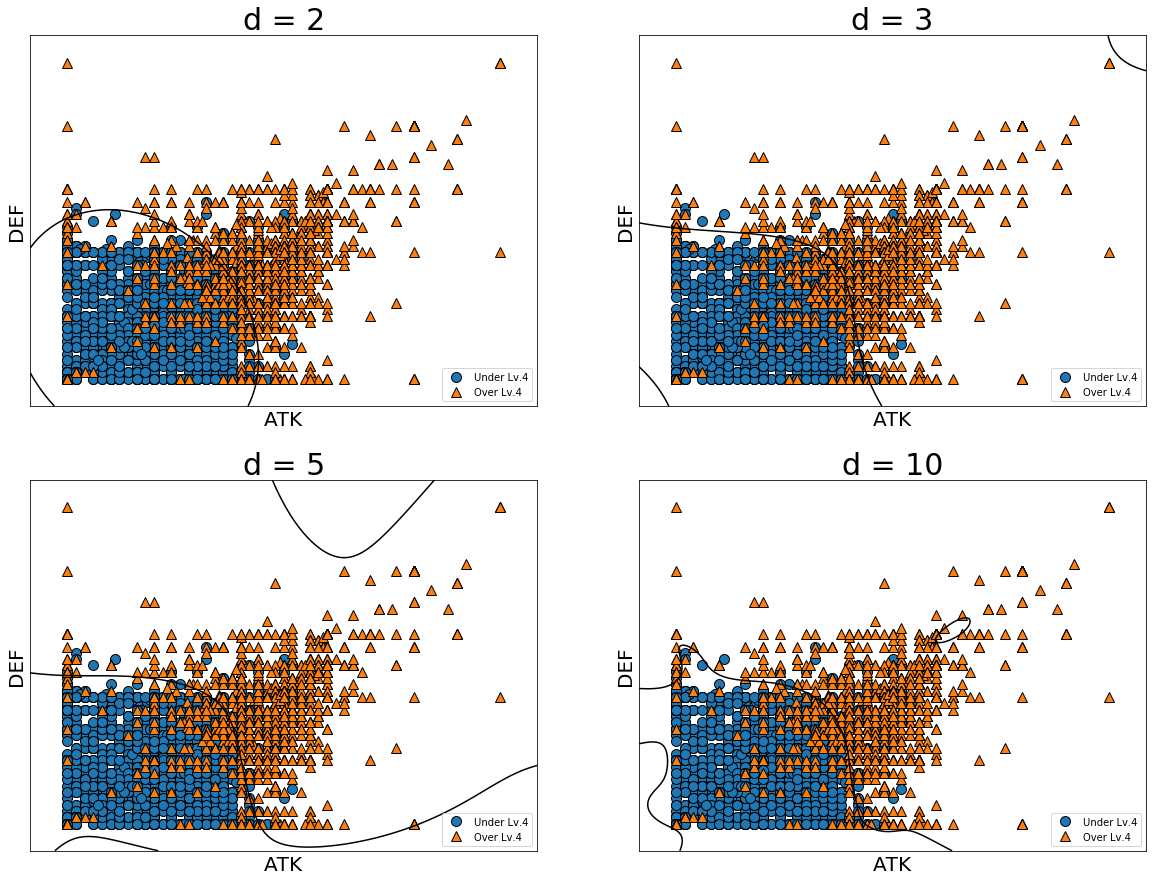

In [33]:
plt.figure(figsize=(20, 15))

for i, degree in enumerate([2, 3, 5, 10]):
    poly_kernel_svm = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='poly', degree=degree, coef0=1))
    ])
    poly_kernel_svm.fit(X, y)
    
    plt.subplot(221 + i)
    mglearn.discrete_scatter(X['ATK'], X['DEF'], y)
    mglearn.plots.plot_2d_separator(poly_kernel_svm, X.values)
    plt.legend(['Under Lv.4', 'Over Lv.4'], loc='best')
    plt.xlabel('ATK', fontsize=20)
    plt.ylabel('DEF', fontsize=20)
    plt.title("d = {}".format(degree), fontsize=30)

plt.show()